## TASK 2 - Image stitching

Group Number: 14

### 1. Data import and SIFT Extraction

Complete ***get_panorama_data(..)*** in _dataset.py_ to read the images and extract the SIFT keypoints and descriptors per image. Check your implementation by plotting the result using ***utils.plot_keypoints(..)***.


***Submission:*** Save the *second* image (from left) of the campus dataset as **task2_keypoints.png** using ***utils.plot_keypoints(..)***.

In [94]:
%load_ext autoreload
%autoreload 1
%aimport transforms, panorama, mapping, dataset, utils
import matplotlib.pyplot as plt
import numpy as np
import transforms
import panorama
import mapping
import dataset
import utils
import cv2

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

data_path = 'data/office_rot'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
#student_code start
images, keypoints, descriptors = dataset.get_panorama_data(data_path)
#student_code end

# check import
print('Number of images: ',len(images))
print('Keypoints length: ', len(keypoints[0]))
print('Descriptor shape: ',descriptors[0].shape)

Number of images:  5
Keypoints length:  2204
Descriptor shape:  (2204, 128)


***
#### What is the meaning of the size of the drawn circles and lines inside the circles?

Answer:
- drawMatchesKnn illustrates the matched SIFT keypoints between two images displayed side-by-side. It draws the k nearest matches for each keypoint (list of lists as matches).

- The lines represent the correspondences/matches between image 1 and image 2. In other words, they show which keypoint in one image is matched to a similar keypoint in the other image.

- The circles represent the positions of the keypoints.

- The size of each circle corresponds to the scale of the keypoint. Bigger circles mark features that appear on larger patterns or structures in the image.

- The line inside each keypoint circle represents its orientation, which corresponds to the main gradient direction around the point. This allows the keypoint descriptor to remain consistent even if the image is rotated.


Note: 
Since the default flag is used in drawMAtchesKnn, only the center point of each keypoint is drawn. To see the circle around the keypoint with its scale and orientation, you would need  DRAW_RICH_KEYPOINTS. However, this flag is only available for drawKeypoints() and not for drawMatchesKnn()!

#### 1.1 Matching

Let's take a look at the matching. Plot the matches between two adjacent images using ***mapping.calculate_matches(..)*** and ***utils.plot_matches(..)***.


***Submission:*** Save plot of matches between the *second and the third image* image of the campus dataset as **task2_matches.png** using ***utils.plot_matches(..)***.


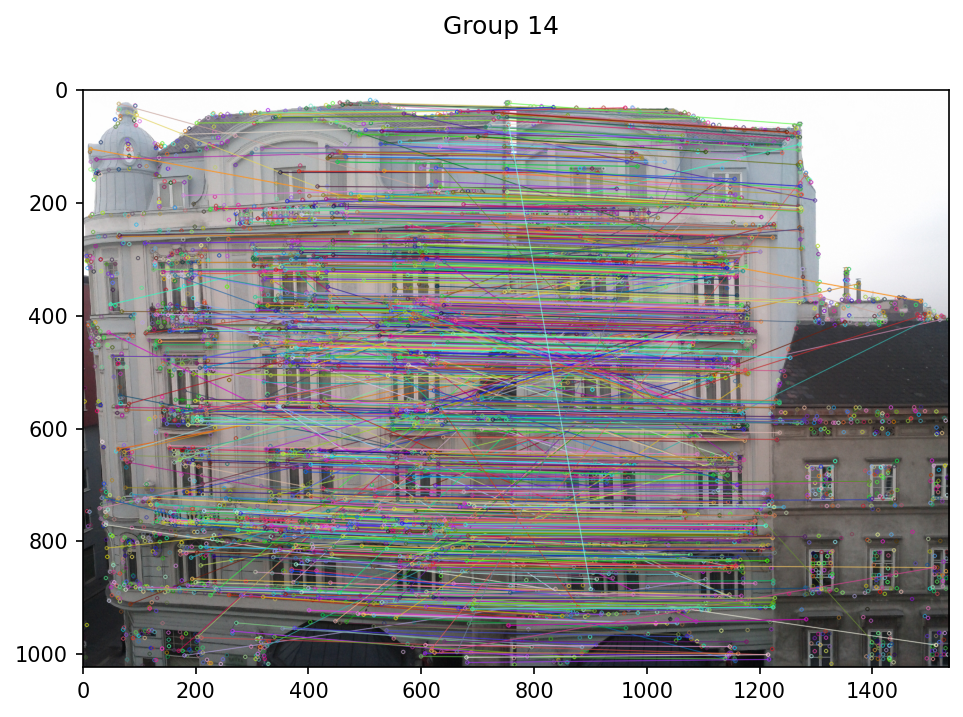

In [96]:

index1 = 1
index2 = 2

#student_code start
matches = mapping.calculate_matches(descriptors[index1], descriptors[index2])

utils.plot_matches(images[index1], images[index2], 
                   keypoints[index1], keypoints[index2], 
                   matches,
                   'Group 14',
                   'task2_matching_drawRichKeypoints.jpg')


#student_code end

***
#### Describe below how the matching, based on LOWE, works.

#ANSWER HERE 

### 2. Image Registration using RANSAC

As you can see in the keypoint matching plot above, the matching algorithm still has some wrong connections. To remove those outliers, you will implement RANSAC and use the remaining inliers to estimate a final tranformation matrix (homography) between two given images. Implement RANSAC in ***get_transform(..)*** in _transforms.py_.

Check your implementation by plotting the result using ***utils.plot_matches(..)***.


***Submission:*** Save a plot showing the matches between the *second and the third image* of the campus dataset again, using the calculated inliers, as **task2_matches_ransac.png** using ***utils.plot_matches(..)***.

In [97]:

#student_code start

#student_code end

***
#### What is the difference to the set of all putative matches you plotted before?

#ANSWER HERE 

#### 2.1 Align Images

Test your homography after RANSAC by transforming a chosen image to the corresponding image on the right and plot with ***transforms.plot_transformed_image(..)***.

_***HINT:***_
_cv2.warpPerspective(..)_


***Submission:*** Save the second image of the campus dataset transformed onto the third one as **task2_matches_transformed.png** using ***utils.plot_transformed_image(..)***.

In [98]:
#student_code start

#student_code end

### 3. Image Stitching

Before, you implemented the basics to calculated homographies between two images. Further, transform all images to a reference image, usually the center one, to get a balanced panorama. Implement and use the method ***to_center(..)*** in _transforms.py_ to get all homographies to the center image.


In [99]:
#student_code start

#student_code end

#### Panorama Extents

One final step before panorama composition is to estimate the final panorama size based on the obtained homographies. Implement ***transforms.get_panorama_extents(..)***

In [100]:
#student_code start



#student_code end

print("Panorama dimension: ", height, " ",width)

NameError: name 'height' is not defined

#### Simple Panorama  

Here is where the magic happens. Using the homographies, translation matrix and panorama extents, you can now stitch the images to a panorama. Implement ***panorama.get_simple(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the campus panorama as **task2_panorama_simple.png** using ***utils.plot_panorama(..)***.

In [ ]:
#student_code start

#student_code end

### 4. Panorama Feathering

The simple panorama might look geometrically correct, but not pleasant enough yet. The intensities are simply stacked. Implement a color blending method to improve the panorama output. 

Complete ***panorama.get_blended(..)*** and check your result with ***utils.plot_panorama(..)***.

***Submission:*** Save the improved blended campus panorama as **task2_panorama_blended.png** using ***utils.plot_panorama(..)***.

In [ ]:
#student_code start

#student_code end


***
#### Compare the result achieved with feathering to the result where no blending has been performed. What is the difference of the two results?

#ANSWER HERE

***
#### Examine if the presented scheme of SIFT interest point detection and RANSAC-based alignment is invariant to changes in image rotation and scale. Thus, resize and rotate the second image of the campus dataset and repeat the panorama process. What do you observe?

***Submission:*** Save the resulting panorama with the rotated images as file ***panorama_rotated_blended.png*** (feathered)

#ANSWER HERE

***
#### Once again, repeat the panorama procedure with your own image sequence. Save and discuss the achieved results. The result might look quite realistic at a first glance but can you spot any errors by looking on details?

***Submission:*** Save the resulting panorama as file ***panorama_own.png*** (feathered) 

#ANSWER HERE